In [ ]:
#2090

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

IMPORT DATASET

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")
df.head(5)

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious


DATA REMOVAL

In [ ]:
#REMOVING NON ENGLISH
df = df[df['Language'] == 'en']
df.head(5)
print(df.shape)

(871310, 3)


REDUCING DATA (**ONLY FOR TESTING PLEASE USE FULL DATASET FOR REPORT BY COMMENTING THE 3RD LINE BELOW)

In [ ]:
#print(df.shape)
df = df.sample(frac=0.10, random_state=42)
#print(df.shape)

SHOWING DISTRIBUTION OF POSTIVE AND NEGATIVE LABELED DATA

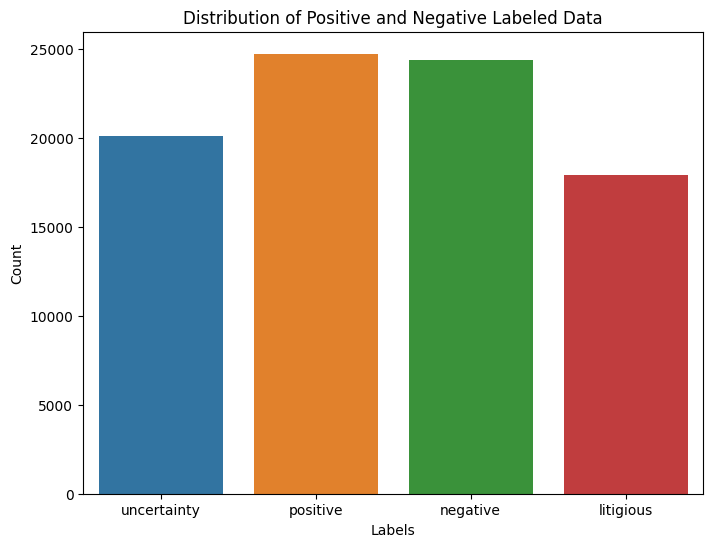

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Label'])
plt.title('Distribution of Positive and Negative Labeled Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

DATA PREPROCESSING

In [ ]:
#LOWER CASING
df['Clean'] = df.apply(lambda row: row['Text'].lower(),axis=1)
#REMOVING @
df['Clean'] = df.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['Clean']),axis=1)
#REMOVING #
df['Clean'] = df.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['Clean']),axis=1)
#REMOVING LINKS
df['Clean'] = df.apply(lambda row: re.sub(r"www.\S+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub(r"http\S+","", row['Clean']),axis=1)
#REMOVING SYMBOLS
df['Clean'] = df.apply(lambda row: re.sub("[^a-z0-9]"," ", row['Clean']),axis=1)
#VIEW CLEANED DATA
df = df[['Clean', 'Label']]
df.head(10)

,Clean,Label
658880,no party nomination with the possible except...,uncertainty
927454,i get asked often do the results really last...,positive
623230,what a incredible giveaway,positive
387639,static coveting subtle radiance anaphoric f...,positive
308229,no health care for smokers figure out wh...,negative
783679,nope it s your fault you voted against helpin...,negative
391210,was this witness in the limo trump sits in...,litigious
51855,you win you are right but that means t...,litigious
236037,oil hawks trade kane for keith if keith is ...,positive
362975,strategy classic into the breach is getting fr...,litigious


SPLITING DATA

In [ ]:
data = df['Clean']
labels = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

TF-IDF VECTORIZING

In [ ]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(1, 3))
# Fit and transform the vectorizer on text data
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

print(X_train.shape[0])
print(X_test.shape[0])


69704
17427


SVC MODEL TRAIN AND TEST


In [ ]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier with TF-IDF vectorized data
svm_classifier.fit(X_train, y_train)

# Predict with the trained SVM classifier
y_pred_svc = svm_classifier.predict(X_test)

# Generate a classification report
report_svc = classification_report(y_test, y_pred_svc)
print('Classification Report:\n', report_svc)


Classification Report:
               precision    recall  f1-score   support

   litigious       0.98      0.97      0.97      3573
    negative       0.97      0.95      0.96      4916
    positive       0.96      0.96      0.96      4896
 uncertainty       0.94      0.97      0.96      4042

    accuracy                           0.96     17427
   macro avg       0.96      0.96      0.96     17427
weighted avg       0.96      0.96      0.96     17427



SVC MODEL CONFUSION MATRIX

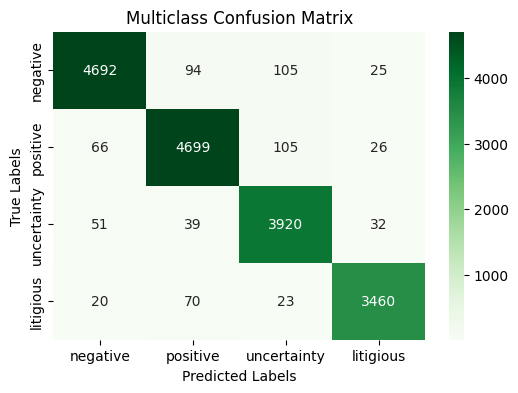

In [ ]:
from sklearn.metrics import confusion_matrix

# Define the subset of labels for display
labels = ['negative', 'positive', 'uncertainty', 'litigious']  # Modify this list as needed

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_svc, labels=labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multiclass Confusion Matrix')
plt.show()


NAIVE BAYES MODEL TRAIN AND TEST


In [ ]:
# Create an NB classifier
nb_classifier = MultinomialNB()

# Train the NB classifier with TF-IDF vectorized data
nb_classifier.fit(X_train, y_train)

# Predict with the trained NB classifier
y_pred_nb = nb_classifier.predict(X_test)

# Generate a classification report
report_nb = classification_report(y_test, y_pred_nb)
print('Classification Report:\n', report_nb)

Classification Report:
               precision    recall  f1-score   support

   litigious       0.94      0.89      0.91      3573
    negative       0.88      0.95      0.91      4916
    positive       0.93      0.92      0.92      4896
 uncertainty       0.91      0.88      0.90      4042

    accuracy                           0.91     17427
   macro avg       0.92      0.91      0.91     17427
weighted avg       0.91      0.91      0.91     17427



NB MODEL CONFUSION MATRIX

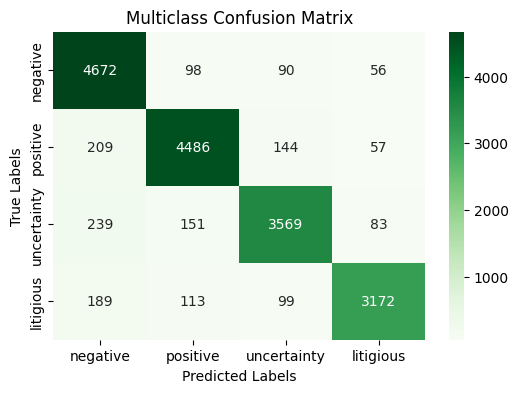

In [ ]:
from sklearn.metrics import confusion_matrix

# Define the subset of labels for display
labels = ['negative', 'positive', 'uncertainty', 'litigious']  # Modify this list as needed

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_nb, labels=labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multiclass Confusion Matrix')
plt.show()


LOGISTIC REGRESSION MODEL TRAIN AND TEST


In [ ]:
# Create the Logistic Regression model
logistic_classifier = LogisticRegression()

# Fit the model to the training data
logistic_classifier.fit(X_train, y_train)

# Predict with the trained LB classifier
y_pred_lr = logistic_classifier.predict(X_test)

# Generate a classification report
report_lr = classification_report(y_test, y_pred_lr)
print('Classification Report:\n', report_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

   litigious       0.98      0.96      0.97      3573
    negative       0.96      0.96      0.96      4916
    positive       0.97      0.96      0.96      4896
 uncertainty       0.95      0.96      0.96      4042

    accuracy                           0.96     17427
   macro avg       0.96      0.96      0.96     17427
weighted avg       0.96      0.96      0.96     17427



LR MODEL CONFUSION MATRIX

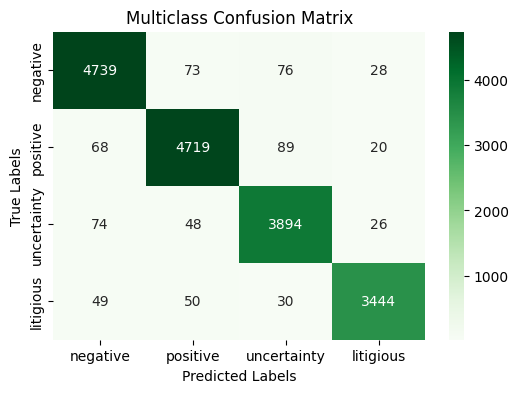

In [ ]:
from sklearn.metrics import confusion_matrix

# Define the subset of labels for display
labels = ['negative', 'positive', 'uncertainty', 'litigious']  # Modify this list as needed

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_lr, labels=labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multiclass Confusion Matrix')
plt.show()


KNN MODEL TRAIN AND TEST (**DISABLED USE IF NEEDED)


In [ ]:
# Create the KNN model
#knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
#knn.fit(X_train, y_train)

# Predict with the trained LB classifier
#y_pred_knn = knn.predict(X_test)

# Generate a classification report
#report_knn = classification_report(y_test, y_pred_knn)
#print('Classification Report:\n', report_knn)

KNN MODEL CONFUSION MATRIX

In [ ]:
#from sklearn.metrics import confusion_matrix

# Define the subset of labels for display
#labels = ['negative', 'positive', 'uncertainty', 'litigious']  # Modify this list as needed

# Generate a confusion matrix
#confusion_mat = confusion_matrix(y_test, y_pred_knn, labels=labels)

# Display the confusion matrix using a heatmap
#plt.figure(figsize=(6, 4))
#sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
#plt.xlabel('Predicted Labels')
#plt.ylabel('True Labels')
#plt.title('Multiclass Confusion Matrix')
#plt.show()


COMPARING MODELS

In [ ]:
print("Logistic Regression Classification Report:")
print(report_svc)


print("\nNaive Bayes Classification Report:")
print(report_nb)

print("\nSupport Vector Classifier Classification Report:")
print(report_lr)

#print("\nKNN Classifier Classification Report:")
#print(report_knn)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   litigious       0.98      0.97      0.97      3573
    negative       0.97      0.95      0.96      4916
    positive       0.96      0.96      0.96      4896
 uncertainty       0.94      0.97      0.96      4042

    accuracy                           0.96     17427
   macro avg       0.96      0.96      0.96     17427
weighted avg       0.96      0.96      0.96     17427


Naive Bayes Classification Report:
              precision    recall  f1-score   support

   litigious       0.94      0.89      0.91      3573
    negative       0.88      0.95      0.91      4916
    positive       0.93      0.92      0.92      4896
 uncertainty       0.91      0.88      0.90      4042

    accuracy                           0.91     17427
   macro avg       0.92      0.91      0.91     17427
weighted avg       0.91      0.91      0.91     17427


Support Vector Classifier Classification Report:
 